### **Importing Libraries**

In [212]:
import numpy as np 
import pandas as pd 

In [213]:


# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading Data**

In [214]:
# reading the data
df=pd.read_csv("C:/Users/Anshul/Desktop/insurance claim prediction/insurance.csv")

In [215]:
# checking the head of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [216]:
# checking the shape
print(df.shape)

(1338, 7)


In [217]:
# describing the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [218]:
# checking if the dataset contains any NULL values
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

### **Data Visualization on few columns**

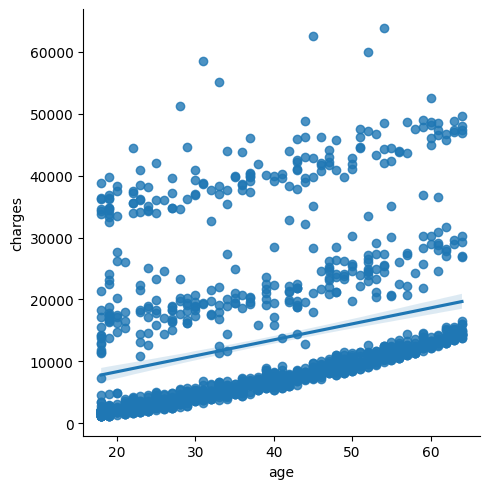

In [219]:
# lmplot between age and charges 
sns.lmplot(x='age', y='charges', data=df)

In [220]:

print(df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


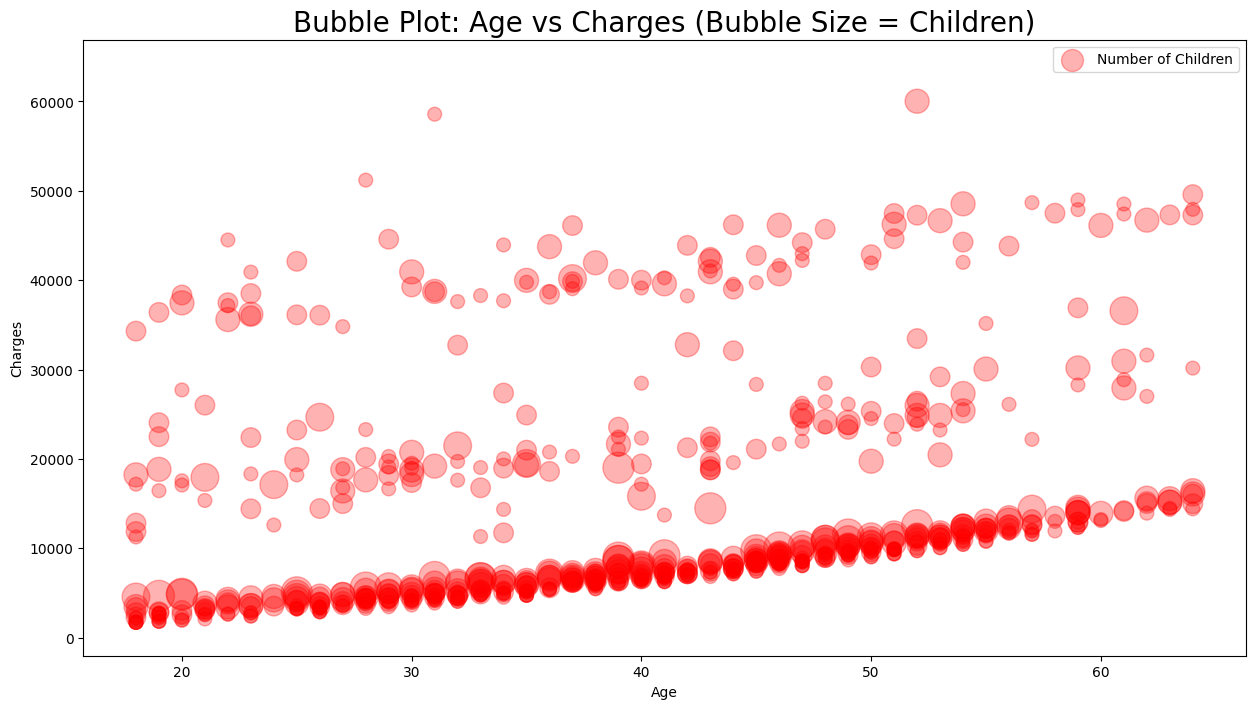

In [221]:

plt.figure(figsize=(15, 8))

plt.scatter(
    x=df['age'],
    y=df['charges'],
    s=df['children'] * 100,   # bubble size represents number of children
    alpha=0.3,
    color='red',
    label='Number of Children'
)

plt.title('Bubble Plot: Age vs Charges (Bubble Size = Children)', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()




In [222]:
# unique value counts in the sex category
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

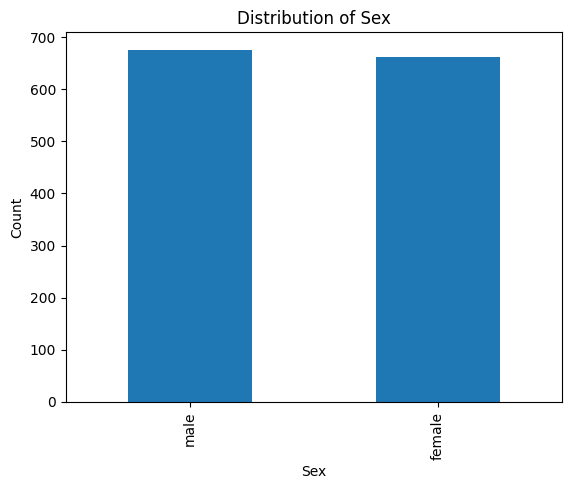

In [223]:

df['sex'].value_counts().plot(kind='bar', title='Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


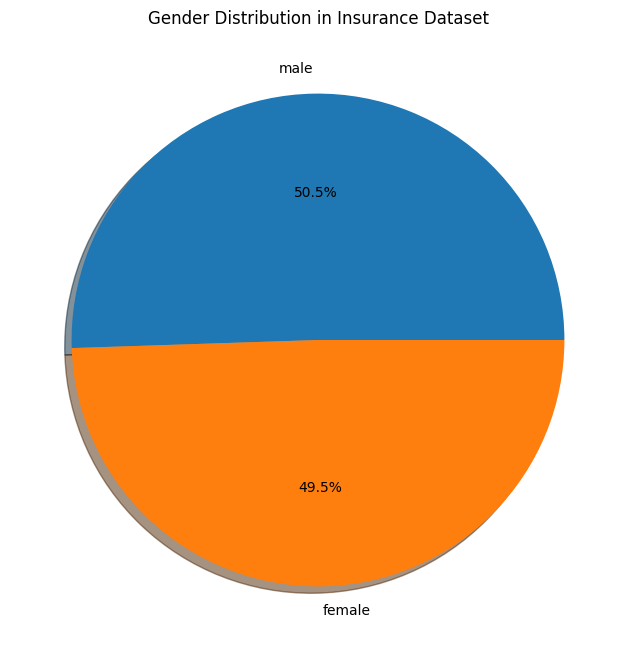

In [224]:
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    sex_counts.values,
    labels=sex_counts.index,
    autopct='%1.1f%%',
    shadow=True
)
plt.title('Gender Distribution in Insurance Dataset')
plt.show()


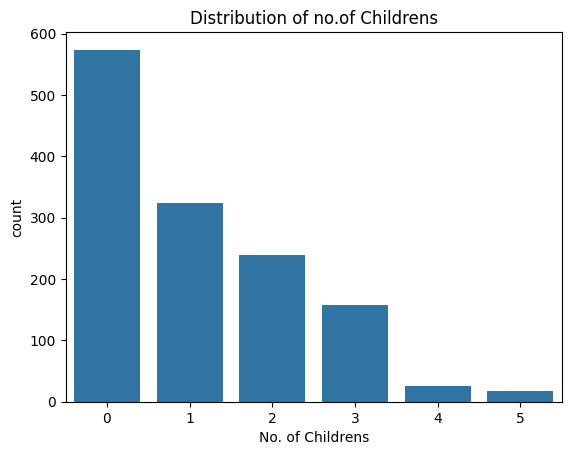

In [225]:
# visualizing how many childrens the customers have
sns.countplot(x='children', data=df)
plt.title('Distribution of no.of Childrens')
plt.xlabel('No. of Childrens')
plt.ylabel('count')
plt.show()

<Axes: xlabel='smoker'>

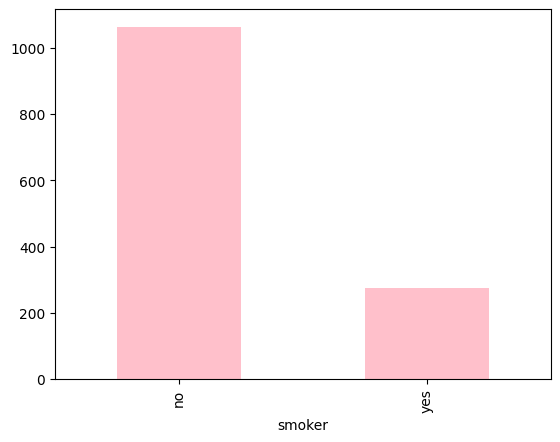

In [226]:
# checking how many people smoke
df['smoker'].value_counts().plot.bar(color = 'pink')

In [227]:
df['smoker'].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

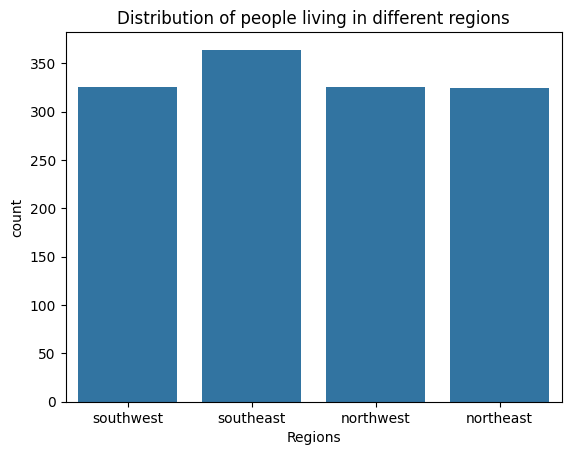

In [228]:
# visualizing the regions from where the people belong
sns.countplot( x='region', data=df)
plt.title('Distribution of people living in different regions')
plt.xlabel('Regions')
plt.ylabel('count')

plt.show()

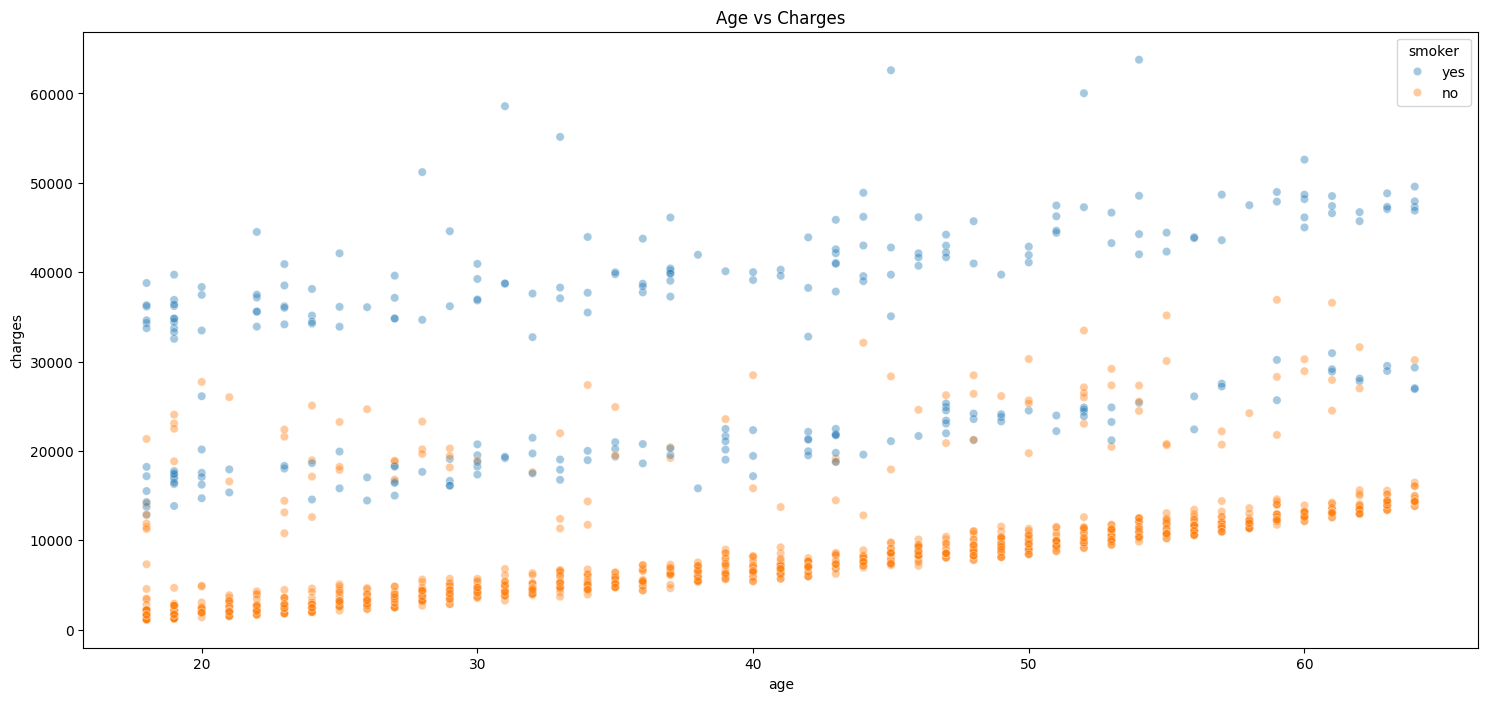

In [229]:
# Age vs Charges
# Insurance charges generally increase with age. (roughly estimated)

plt.figure(figsize=(18, 8))
sns.scatterplot(x='age', y='charges',hue='smoker', data=df, alpha=0.4)
plt.title("Age vs Charges")
plt.show()



 
 
 ### **Removing Unnecessary Columns**

In [230]:
# removing unnecassary columns from the dataset

df = df.drop('region', axis = 1)

print(df.shape)

df.columns

(1338, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

### **Encoding Techniques**

In [231]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()

# label encoding
df['sex'] = le.fit_transform(df['sex'])       # female=0, male=1
df['smoker'] = le.fit_transform(df['smoker']) # no=0, yes=1

In [232]:
# splitting the dependent and independent variable

x = df.iloc[:,:5]
y = df.iloc[:,5]

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [233]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=30
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [234]:
feature_names = x.columns


In [235]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)  # fit + transform TRAIN
x_test  = sc.transform(x_test)       # ONLY transform TEST



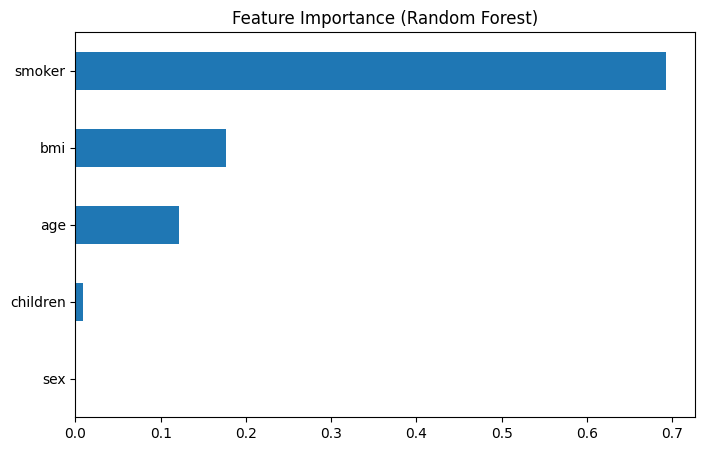

In [236]:

feature_names = ['age', 'sex', 'bmi', 'children', 'smoker']
importances = model.feature_importances_

pd.Series(importances, index=feature_names)\
  .sort_values()\
  .plot(kind='barh', figsize=(8,5))

plt.title("Feature Importance (Random Forest)")
plt.show()


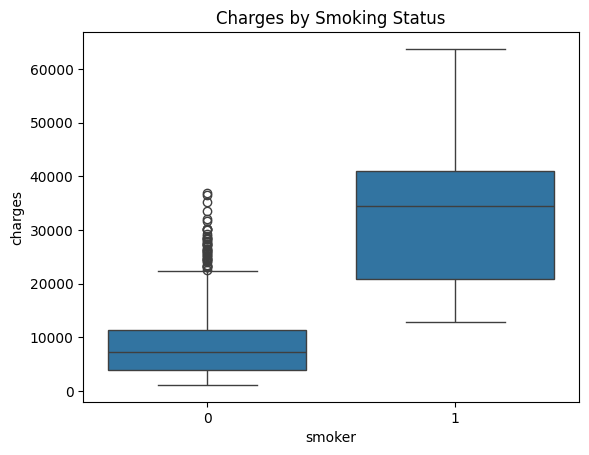

In [237]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoking Status')
plt.show()



In [238]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=40,
    max_depth=4,
    n_jobs=-1,
    random_state=30
)

model.fit(x_train, y_train)
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 22313029.65293459
RMSE: 4723.666971001934
R2 Score: 0.8553478711409974


### **Prediction on Unseen Data**

In [211]:
# Example unseen customer
new_data = [[20, 1, 27, 0, 1]]   # age, sex, bmi, children, smoker

single = pd.DataFrame(
    new_data,
    columns=['age', 'sex', 'bmi', 'children', 'smoker']
)

# ONLY transform using trained scaler
single_scaled = sc.transform(single)

# Predict using trained model
y_pred_single = model.predict(single_scaled)

print("The claim for this customer is:", y_pred_single[0])


The claim for this customer is: 18619.357665952088
